# Introduction
Assume we have a model that predict an outcome using the input features. 

Shapley Values attempt to answer the question "how much does each of the features contribute to the predicted outcome?" by calculating the predicted outcome from one observation in a dataset vs. the average predicted outcome from the entire dataset.

# How it works
1. Get a random permutation of the features
2. Pick a random sample from the dataset
3. 

# Pros
- Model agnostic

# Cons

# Regression (Random Forest)

In [2]:
initjs()

NameError: name 'initjs' is not defined

Root Mean Squared Error: 0.6512321564738544


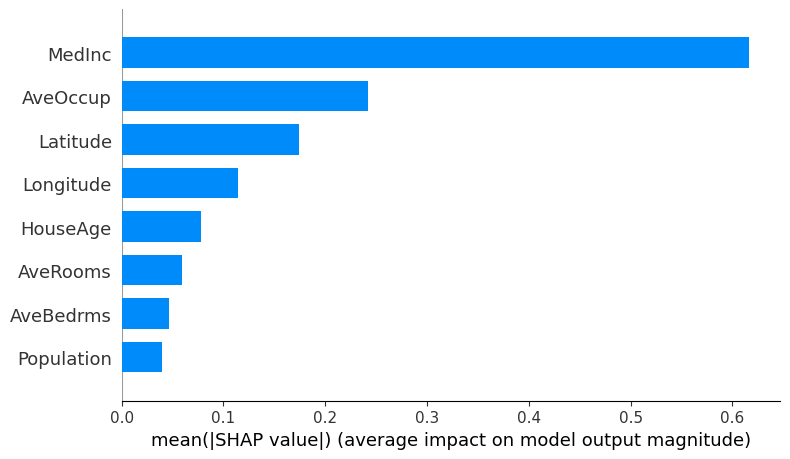

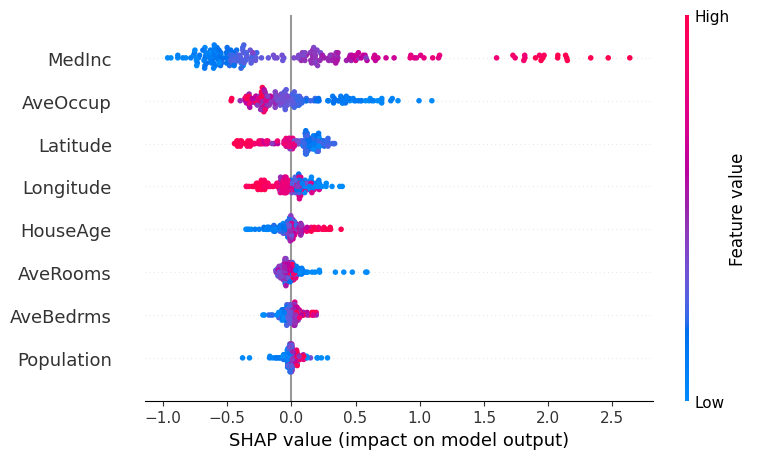

In [3]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize JavaScript visualization
shap.initjs()

# Load the California housing dataset
X, y = shap.datasets.california(n_points=1000)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

# Create a SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

# Analyze a single prediction
single_prediction = X_test.iloc[0]
shap.force_plot(explainer.expected_value, shap_values[0], single_prediction)


# Classification (Random Forest)

Accuracy: 1.0000


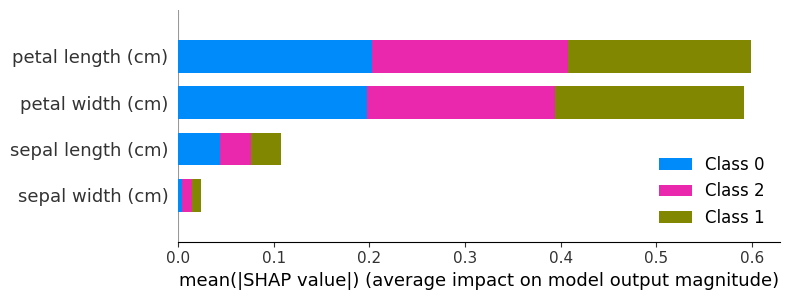

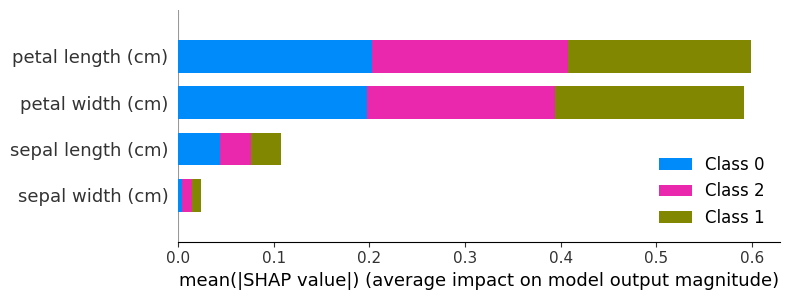

In [4]:
import shap
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize JavaScript visualization
shap.initjs()

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Create a SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

# Analyze a single prediction
single_prediction = X_test.iloc[0]
shap.force_plot(explainer.expected_value[0], shap_values[0][0], single_prediction)
